In [1]:
import numpy as np
import scipy.stats as sp 
import pandas as pd 

import OmicsUtils.OutlierStatMethods.outlier_sum_stat_perm


## 0. Generate pseudo datasets for disease and controls 

In [2]:
np.random.seed(1234)
rng = np.random.default_rng()

In [3]:
disease_data = pd.DataFrame(rng.normal(2.0, 1, size=(50, 200)))
control_data = pd.DataFrame(rng.normal(1.0, 1, size=(50, 200)))

## 1. Initialize subclass and apply Outlier Stat Methods

In [4]:
OSPerm_cls = OmicsUtils.OutlierStatMethods.outlier_sum_stat_perm.OSPerm(disease_data=disease_data, control_data=control_data)

01/11//2023 05:18:1698839313 PM - DEBUG - OSPerm: Initialized OS Perm class


In [5]:
stats = OSPerm_cls.get_stats()

01/11//2023 05:18:1698839315 PM - INFO - OSPerm.get_stats: Calculating median, mad and applying mad normalization
01/11//2023 05:18:1698839315 PM - INFO - OSPerm.get_stats: Generating null distribution
01/11//2023 05:18:1698839328 PM - INFO - OSPerm.get_stats: Consolidating stats into dictionary
01/11//2023 05:18:1698839328 PM - INFO - OSPerm.get_stats: Finished applying outlier stat methods


## 2. Visualize and Interpret results

In [7]:
import seaborn as sns

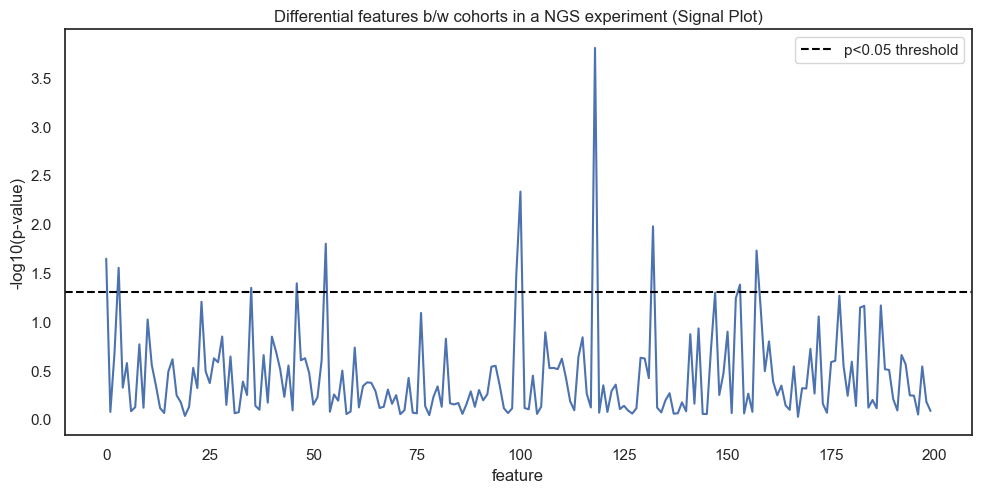

In [8]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.set_style('white')
locs = np.arange(0, OSPerm_cls.no_of_feats,1)
y_vals = -np.log10(stats['pvalues'])
ax = sns.lineplot(x=locs, y=y_vals)
ax.axhline(-np.log10(0.05), linestyle='--', color='black', label='p<0.05 threshold')
ax.set_xlabel('feature')
ax.set_ylabel('-log10(p-value)')
ax.set_title('Differential features b/w cohorts in a NGS experiment (Signal Plot)')
ax.legend()

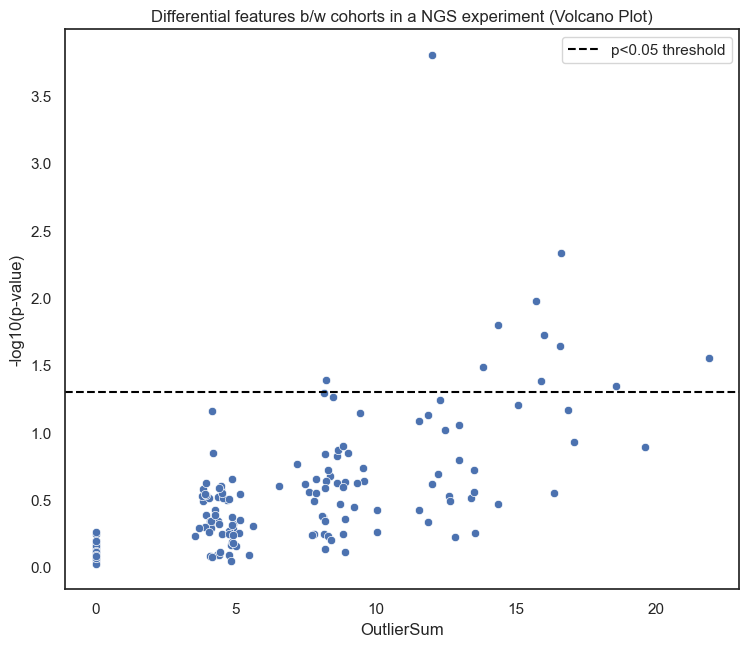

In [9]:
sns.set(rc={'figure.figsize':(8.7,7.27)})
sns.set_style('white')
x_vals = stats['OutlierSum']
y_vals = -np.log10(stats['pvalues'])
ax = sns.scatterplot(x=x_vals, y=y_vals)
ax.axhline(-np.log10(0.05), linestyle='--', color='black', label='p<0.05 threshold')
ax.set_xlabel('OutlierSum')
ax.set_ylabel('-log10(p-value)')
ax.set_title('Differential features b/w cohorts in a NGS experiment (Volcano Plot)')
ax.legend()